In [1]:
pip install opencv-python numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install pytesseract openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [4]:
pip install tesseract

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import pytesseract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from PIL import Image, ImageDraw

In [7]:
# Load image using PIL (high quality)
image = Image.open(r"C:\Users\jyoth\Desktop\Adaptive_Schema_Extraction\DATASET\STAGE 1 DATASET\Aadhaar_letter_large.jpeg")

In [8]:
# Display the image to check clarity
image.show()

In [9]:
# Convert image to grayscale (PIL handles it better than OpenCV)
gray_image = image.convert("L")  # "L" mode = grayscale

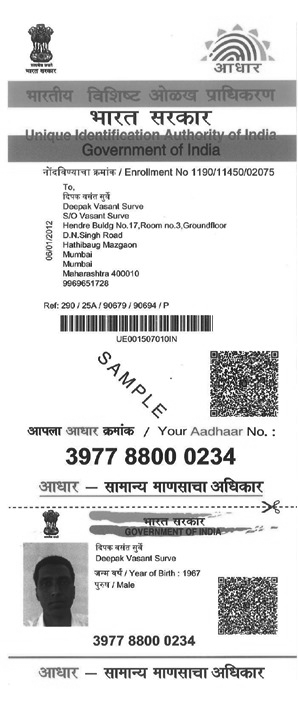

In [10]:
# Display the grayscale image
gray_image

In [11]:
aadhaar_roi = (50, 443, 250, 25)  # (x, y, w, h) - Aadhaar Number
name_roi = (90, 550, 200, 15)     # Name ROI
dob_roi = (130, 565, 100, 15)  

In [12]:
# Create a copy of the image for drawing
image_with_boxes = gray_image.copy()
draw = ImageDraw.Draw(image_with_boxes)

In [13]:
# Draw rectangles around ROIs
draw.rectangle(
    [aadhaar_roi[0], aadhaar_roi[1], aadhaar_roi[0] + aadhaar_roi[2], aadhaar_roi[1] + aadhaar_roi[3]],
    outline="black", width=3
)
draw.rectangle(
    [name_roi[0], name_roi[1], name_roi[0] + name_roi[2], name_roi[1] + name_roi[3]],
    outline="black", width=3
)
draw.rectangle(
    [dob_roi[0], dob_roi[1], dob_roi[0] + dob_roi[2], dob_roi[1] + dob_roi[3]],
    outline="black", width=3
)

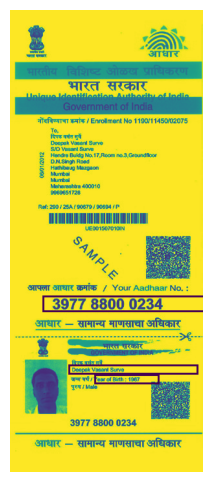

In [14]:
# Display the image using matplotlib (better for Jupyter Notebook)
plt.figure(figsize=(8, 6))
plt.imshow(image_with_boxes)
plt.axis("off")  # Hide axes
plt.show()

In [15]:
aadhaar_crop = gray_image.crop((aadhaar_roi[0], aadhaar_roi[1], aadhaar_roi[0] + aadhaar_roi[2], aadhaar_roi[1] + aadhaar_roi[3]))
name_crop = gray_image.crop((name_roi[0], name_roi[1], name_roi[0] + name_roi[2], name_roi[1] + name_roi[3]))

In [16]:
# Display the image with ROIs
image_with_boxes.show()

In [17]:
# Perform OCR with specific configs
aadhaar_text = pytesseract.image_to_string(aadhaar_crop, config="--psm 6 -c tessedit_char_whitelist=0123456789")
name_text = pytesseract.image_to_string(name_crop, config="--psm 6")

In [18]:
# Print results
print("Extracted Aadhaar Number:", aadhaar_text.strip())
print("Extracted Name:", name_text.strip())

Extracted Aadhaar Number: 397788000234
Extracted Name: ‘Deopak Vasant Surve


In [19]:
# Function to extract text from an ROI
def extract_text(image, roi):
    x, y, w, h = roi
    cropped = image.crop((x, y, x + w, y + h))  # Crop using PIL
    text = pytesseract.image_to_string(cropped, config="--psm 6").strip()
    return text

In [20]:
# Extract text from each ROI
aadhaar_number = extract_text(image, aadhaar_roi)
name = extract_text(image, name_roi)

In [21]:
# Store in a DataFrame
data = {
    "Aadhaar Number": [aadhaar_number],
    "Name": [name]
}
df = pd.DataFrame(data)

In [22]:
# Save to an Excel file
excel_path = "aadhaar_details.xlsx"  # Change path if needed
df.to_excel(excel_path, index=False)

print(f"✅ Data saved to {excel_path}")

✅ Data saved to aadhaar_details.xlsx
